<a href="https://colab.research.google.com/github/claredavies/DataEngAPITesting/blob/master/CD_lesson_Image_Processing_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/PBibiloni/11761.git

Cloning into '11761'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 92 (delta 46), reused 83 (delta 37), pack-reused 0
Unpacking objects: 100% (92/92), done.


# Lesson 1

In [11]:
!cd 11761 && git checkout lesson01

Switched to branch 'lesson01'
Your branch is up to date with 'origin/lesson01'.


Introduction

In [32]:
import time

import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# 1) Load the `mandril` image with OpenCV (see `cv2.imread(...)`)
img = cv2.imread('11761/samples/mandril.tiff')

# 2) Find dtype, size (in pixels), and number of channels of the image (see `[img].dtype` and `[img].shape`)
print(f'Loaded image: dtype (data type)={img.dtype}')

# get dimensions of image
dimensions = img.shape
 
# height, width, number of channels in image
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]

print(f'Loaded image: dimensions={dimensions} .')
print(f'Loaded image: height={height} px')
print(f'Loaded image: width={width} px')
print(f'Loaded image: channels={channels}')
print(f'Loaded image: size={height} x {width} px')


# 3) Transform from BGR to RGB and Grayscale (see `cv2.cvtColor(...)`, `cv2.COLOR_BGR2RGB`, `cv2.COLOR_BGR2GRAY`)


# 4) Visualize with OpenCV (see `cv2.imshow(...)`, `cv2.waitKey(...)` and `cv2.destroyAllWindows(...)`)


# 5) Visualize with Matplotlib (see `plt.imshow(...)` and `plt.show()`)


# 6) Load video from file, and display it using OpenCV (see `cv2.VideoCapture(...)`)


# 7) If available, load video from webcam, and display it using OpenCV (use `cv2.VideoCapture(0)`)

Loaded image: dtype (data type)=uint8
Loaded image: dimensions=(512, 512, 3) .
Loaded image: height=512 px
Loaded image: width=512 px
Loaded image: channels=3
Loaded image: size=512 x 512 px


# Lesson 2

In [12]:
!cd 11761 && git checkout lesson02

Switched to branch 'lesson02'
Your branch is up to date with 'origin/lesson02'.


Noise

In [14]:
!pwd
!ls

/content
11761  sample_data


Task 1 -Noise

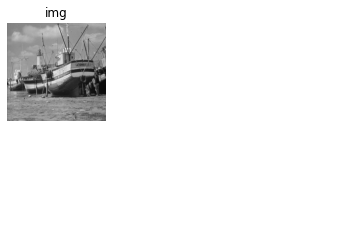

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def additive_white_gaussian_noise(image: np.ndarray, std: float) -> np.ndarray:
    """Adds additive white Gaussian noise to an image."""
    # YOUR CODE HERE: see `np.random.normal(...)`
    # ...


def uniform_multiplicative_noise(image: np.ndarray, a: float, b: float) -> np.ndarray:
    """Adds uniform multiplicative noise to an image."""
    # YOUR CODE HERE: see `np.random.uniform(...)`
    # ...


def salt_and_pepper_noise(image: np.ndarray, p: float) -> np.ndarray:
    """Adds salt and pepper noise to an image."""
    # YOUR CODE HERE: see `np.random.uniform(...)` and `np.random.choice(...)`
    # ...


def shot_noise(image: np.ndarray) -> np.ndarray:
    """Add shot noise to an image."""
    # YOUR CODE HERE: see `np.random.poisson(...)`
    # ...


if __name__ == '__main__':
    # Show effect on boat image.
    img = cv2.imread('11761/samples/boat.tiff', cv2.IMREAD_GRAYSCALE)  # Read the image.
    # img = np.float32(img) / 255
    img = img.astype('float32')  # Convert to float32 to avoid overflow and rounding errors
    results = {
        'img': img,
        'AWGN': additive_white_gaussian_noise(img, std=10.0),
        'uniform_multiplicative': uniform_multiplicative_noise(img, a=0.7, b=1.3),
        'salt_and_pepper': salt_and_pepper_noise(img, p=0.20),
        'shot_noise': shot_noise(img),
    }
    results = {k: v for k, v in results.items() if v is not None}  # Remove None values.

    # Visualize images
    fig, axs = plt.subplots(2, 3)
    # Remove default axis
    for ax in axs.flatten():
        ax.axis('off')
    # Show one image per subplot
    for ax, (title, img) in zip(axs.flatten(), results.items()):
        ax.set_title(title)
        ax.imshow(img, cmap='gray')
    # Display figure
    plt.show()

**Task 2- Convolution**


In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


def convolution(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """Sequence of limits of each bin (e.g. [0.0, 85.0, 170.0, 255.0] for 3 bins)."""
    # YOUR CODE HERE
    # ...
    img_sz_x, img_sz_y = image.shape
    krn_sz_x, krn_sz_y = kernel.shape
    out_sz_x = img_sz_x - krn_sz_x + 1  # Why?
    out_sz_y = img_sz_y - krn_sz_y + 1  # Why?
    out = np.zeros(shape=(out_sz_x, out_sz_y), dtype=image.dtype)
    for i in range(out_sz_x):
        for j in range(out_sz_y):
            # YOUR CODE HERE
            # ...
    return out


if __name__ == '__main__':
    # Show effect on subset of boat image.
    img = cv2.imread('11761/samples/boat.tiff', cv2.IMREAD_GRAYSCALE)  # Read the image.
    img = img.astype('float32')     # Convert to float32 to avoid overflow and rounding errors
    img = img[150:200, 150:200]     # Select a small window

    kernels = {
        'identity': np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]),
        'shift_left': np.array([[0, 0, 0], [1, 0, 0], [0, 0, 0]]),
        'smooth': np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9,
        'sharpen': np.array([[-1, -1, -1], [-1, 17, -1], [-1, -1, -1]]) / 9,
    }
    results = {
        name: convolution(img, kernel)
        for name, kernel in kernels.items()
    }
    results = {k: v for k, v in results.items() if v is not None}  # Remove None values.

    # Visualize images
    fig, axs = plt.subplots(2, 2)
    # Remove default axis
    for ax in axs.flatten():
        ax.axis('off')
    # Show one image per subplot
    for ax, (title, img) in zip(axs.flatten(), results.items()):
        ax.set_title(title)
        ax.imshow(img, cmap='gray')
    # Display figure
    plt.show()

IndentationError: ignored

Task 3 - filters

In [17]:
from typing import Tuple

import cv2
import numpy as np
from matplotlib import pyplot as plt


def kernel_squared_mean_filter(size: Tuple[int, int]) -> np.ndarray:
    """Returns a kernel the of given size for the mean filter."""
    # YOUR CODE HERE: see `np.ones(...)`
    # ...
    return np.ones(shape=size, dtype=np.float32) / np.prod(size)


def kernel_gaussian_filter(size: Tuple[int, int], sigma: float) -> np.ndarray:
    """Returns a kernel of the given size for the Gaussian filter."""
    # YOUR CODE HERE: see `np.exp(...)`
    # ...
    kernel = np.zeros(shape=size, dtype=np.float32)
    gaussian = np.exp((-1/2)*((x+y)/sigma)*
    gaussian = np.exp(-((i-size[0]//2)**2 + (j-size[1]//2)**2)/(2*sigma**2))


def kernel_sharpening(kernel_smoothing: np.ndarray, alpha: float) -> np.ndarray:
    """Returns a kernel for sharpening the image."""
    # YOUR CODE HERE: see `np.zeros(...)` and `np.zeros_like(...)`
    # ...


def kernel_horizontal_derivative() -> np.ndarray:
    """Returns a 3x1 kernel for the horizontal derivative using first order central difference coefficients. """
    # YOUR CODE HERE
    # ...


def kernel_vertical_derivative() -> np.ndarray:
    """Returns a 1x3 kernel for the vertical derivative using first order central difference coefficients. """
    # YOUR CODE HERE: see `np.transpose(...)`
    # ...


def kernel_sobel_horizontal() -> np.ndarray:
    """Returns the sobel operator for horizontal derivatives. """
    # YOUR CODE HERE
    # ...


def kernel_sobel_vertical() -> np.ndarray:
    """Returns the sobel operator for vertical derivatives. """
    # YOUR CODE HERE: see `np.transpose(...)`
    # ...


def kernel_LoG_filter() -> np.ndarray:
    """Returns a 3x3 kernel for the Laplacian of Gaussian filter."""
    # YOUR CODE HERE
    # ...


if __name__ == '__main__':
    # Show effect on subset of boat image.
    img = cv2.imread('samples/boat.tiff', cv2.IMREAD_GRAYSCALE)  # Read the image.
    img = img.astype('float32')     # Convert to float32 to avoid overflow and rounding errors
    img = img[150:200, 150:200]     # Select a small window

    kernels = {
        'kernel_squared_mean_filter': kernel_squared_mean_filter(size=(3, 3)),
        'kernel_gaussian_filter': kernel_gaussian_filter(size=(3, 3), sigma=10.0),
        'kernel_sharpening': kernel_sharpening(kernel_squared_mean_filter(size=(3, 3)), alpha=2),
        'kernel_horizontal_derivative': kernel_horizontal_derivative(),
        'kernel_vertical_derivative': kernel_vertical_derivative(),
        'kernel_sobel_horizontal': kernel_sobel_horizontal(),
        'kernel_sobel_vertical': kernel_sobel_vertical(),
        'kernel_LoG_filter': kernel_LoG_filter(),
    }
    kernels = {k: v for k, v in kernels.items() if v is not None}  # Remove None values.

    for name, kernel in kernels.items():
        output = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
        # Visualize images
        fig, axs = plt.subplots(1, 2)
        axs[0].set_title(name)
        im = axs[0].imshow(kernel, cmap='gray')
        plt.colorbar(im, ax=axs[0])
        axs[1].imshow(output, cmap='gray')  # ddpeth=-1 means same as input
        # Display figure
        plt.show()

SyntaxError: ignored